In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test', 'train.csv', 'sample_submission.csv']


In [2]:
from fastai.vision import *

In [3]:
# import everything into databunch
path = Path("../input/")
tfms = get_transforms(flip_vert=True, do_flip=True)
data = ImageDataBunch.from_csv(path=path, csv_labels='train.csv', folder='train/train',
                              test='test/test',ds_tfms = tfms)
data

ImageDataBunch;

Train: LabelList (14000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
1,1,1,1,0
Path: ../input;

Valid: LabelList (3500 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,1,1
Path: ../input;

Test: LabelList (4000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: ../input

OK, so now we have our ImageDataBunch. We now need a model to train the data on.

In [4]:
learn = cnn_learner(data, models.resnet50, model_dir="/tmp/model/",
                   metrics = [error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 80142309.88it/s]


In [5]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


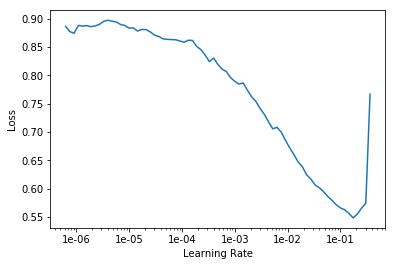

In [6]:
learn.recorder.plot()

In [7]:
# Let's now try to fit a first epoch.
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.078718,0.046422,0.016000,0.984000,00:27


That is already quite remarkable (98% accuracy). Now the next step is to unfreeze the model and check if we can get even better accuracy (one also needs to know what is the metric used to score the exercise).

In [8]:
learn.save('fit-first-epoch')

In [22]:
learn.load('fit-first-epoch');

In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(11, slice(1e-4, 2e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.054936,0.037350,0.013143,0.986857,00:27
1,0.064011,0.027184,0.007429,0.992571,00:25
2,0.042263,0.059278,0.025143,0.974857,00:25
3,0.037215,0.021740,0.007429,0.992571,00:27
4,0.033474,0.018518,0.004857,0.995143,00:26
5,0.031866,0.016508,0.005143,0.994857,00:26
6,0.019884,0.006766,0.001143,0.998857,00:27
7,0.015638,0.009132,0.002857,0.997143,00:25
8,0.009912,0.011276,0.004286,0.995714,00:26
9,0.008638,0.007705,0.002571,0.997429,00:29


In [25]:
learn.save('after-11-epochs');

In [ ]:
#learn.load('after-6-epochs');

In [26]:
# submit a prediction
# copied from https://www.kaggle.com/interneuron/fast-fastai-with-condensenet
preds,_ = learn.get_preds(ds_type=DatasetType.Test)

In [33]:
test_df = pd.read_csv("../input/sample_submission.csv")
test_df.has_cactus = preds.numpy()[:, 1]

In [34]:
test_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.999828
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.998855
2,001ee6d8564003107853118ab87df407.jpg,0.999550
3,002e175c3c1e060769475f52182583d0.jpg,0.007979
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.999866


In [ ]:
to_np(p)

In [ ]:
#submission = pd.DataFrame({'id':[i.name for i in learn.data.test_ds.items],'has_cactus': p[:,1]})

In [ ]:
#submission.head()

In [35]:
#submission.to_csv('submission.csv', index=False)
test_df.to_csv('submission.csv', index=False)